In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


1-1.

parameter w0: [[3.94188011]]
parameter w1: [[8.73592461]]


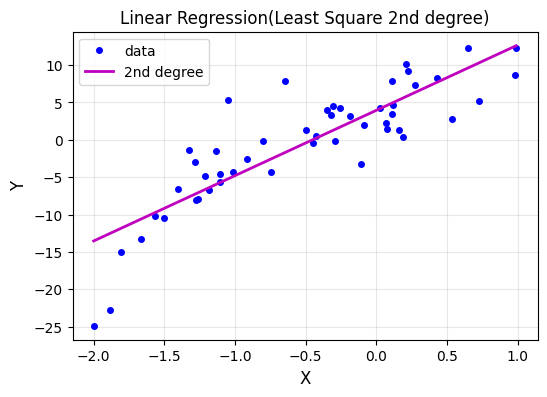

In [38]:
url='/content/drive/MyDrive/data0405.csv'

x=pd.read_csv(url, usecols=['x']).values
y=pd.read_csv(url, usecols=['y']).values

A=np.hstack([x**0, x])
A=np.asmatrix(A)

w=(A.T*A).I*A.T*y
xp=np.arange(-2, 1.0, 0.01).reshape(-1,1)
yp=w[0,0]+w[1,0]*xp #최소제곱법

for i in range(2):
  print("parameter w"+str(i)+":",w[i]) #파라미터출력

plt.figure(figsize=(6, 4))
plt.plot(x,y,'bo', markersize=4, label="data")
plt.plot(xp, yp,'m', linewidth=2, label='2nd degree')
plt.title('Linear Regression(Least Square 2nd degree)')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.axis('auto')
plt.show()

1-2-1.

parameter w0: [[5.03906362]]
parameter w1: [[5.27924916]]
parameter w2: [[-3.31676315]]


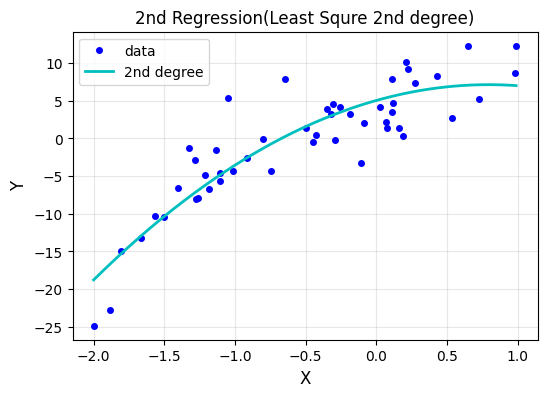

In [43]:
A=np.hstack([x**0, x, x**2])
A=np.asmatrix(A)

w=(A.T*A).I*A.T*y
xp=np.arange(-2, 1.0, 0.01).reshape(-1,1)
yp=w[0,0]+w[1,0]*xp+w[2,0]*xp**2 #최소제곱법

for i in range(3):
  print("parameter w"+str(i)+":",w[i]) #파라미터출력

plt.figure(figsize=(6, 4))
plt.plot(x,y,'bo', markersize=4, label="data")
plt.plot(xp[:,0], yp[:,0],'c', linewidth=2, label='2nd degree')
plt.title('2nd Regression(Least Squre 2nd degree)')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.axis('auto')
plt.show()

1-2-2.

parameter w0: [[2.70561069]]
parameter w1: [[8.7466361]]
parameter w2: [[24.11081469]]
parameter w3: [[-7.17740071]]
parameter w4: [[-70.59489961]]
parameter w5: [[-20.12073822]]
parameter w6: [[59.53548381]]
parameter w7: [[36.49128236]]
parameter w8: [[-8.88620274]]
parameter w9: [[-11.06845324]]
parameter w10: [[-2.15841396]]


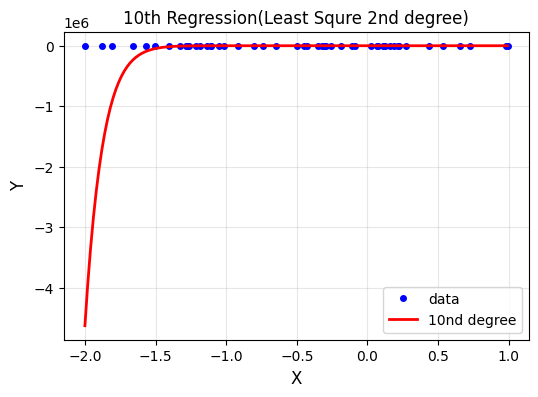

In [42]:
A=np.hstack([x**0, x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10])
A=np.asmatrix(A)
w=(A.T*A).I*A.T*y

for i in range(11):
  print("parameter w"+str(i)+":",w[i]) #파라미터출력

xp=np.arange(-2, 1.0, 0.01).reshape(-1,1)
yp=w[0,0]+w[1,0]*xp+w[2,0]*xp**2**2+w[3,0]*xp**3+w[4,0]*xp**4**2+w[5,0]*xp**5+w[6,0]*xp**6+w[7,0]*xp**7+w[8,0]*xp**8+w[9,0]*xp**9+w[10,0]*xp**10 #최소제곱법

plt.figure(figsize=(6, 4))
plt.plot(x,y,'bo', markersize=4, label="data")
plt.plot(xp[:,0], yp[:,0],'r', linewidth=2, label='10nd degree')
plt.title('10th Regression(Least Squre 2nd degree)')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.axis('auto')
plt.show()

2-1.

parameter w0: [[3.94188011]]
parameter w1: [[8.73592461]]


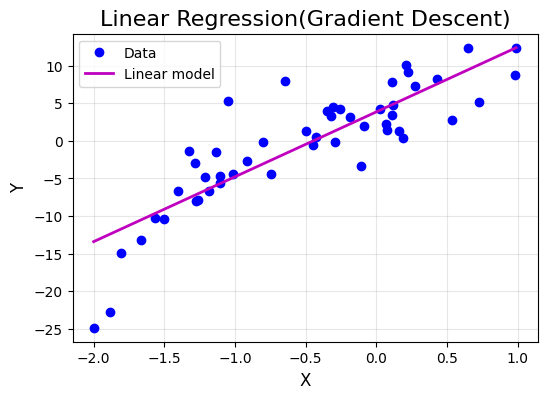

In [35]:
w0=0
w1=0

lrate=0.01 #학습률
epochs=1000 #반복횟수(에폭)
w=(A.T*A).I*A.T*y
n=float(len(x))

#경사하강법
for i in range(epochs):
  yp=w0+w1*x
  dw1=(1/n)*sum(x*(yp-y))
  dw0=(1/n)*sum(yp-y)
  w0=w0-lrate*dw0
  w1=w1-lrate*dw1

for i in range(2):
  print("parameter w"+str(i)+":",w[i]) #파라미터출력

plt.figure(figsize=(6,4))
plt.title('Linear Regression(Gradient Descent)',fontsize=16)
plt.xlabel('X',fontsize=12)
plt.ylabel('Y',fontsize=12)
plt.plot(x,y,'bo',label='Data')

xp=np.arange(-2.0,1.0,0.01).reshape(-1,1)
yp=w1*xp+w0 #예측값

plt.plot(xp,yp,'m',linewidth=2,label='Linear model')
plt.legend()
plt.axis('auto')
plt.grid(alpha=0.3)
plt.show()

2-2-1.

parameter w0: [4.97354912]
parameter w1: [5.68059215]
parameter w2: -3.0174470342424287


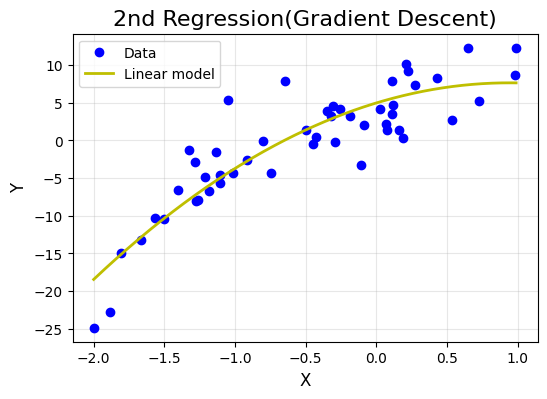

In [31]:
w2=0
w=(A.T*A).I*A.T*y

lrate=0.01 #학습률
epochs=1000 #반복횟수(에폭)

#비선형 2차
for i in range(epochs):
  yp=w0+w1*x+w2*x**2
  dw0=(1/n)*np.sum(yp-y)
  dw1=(1/n)*np.sum((yp-y)*x)
  dw2=(1/n)*np.sum((yp-y)*x**2)
  w0=w0-lrate*dw0
  w1=w1-lrate*dw1
  w2=w2-lrate*dw2

w = [w0, w1, w2]
for i in range(3):
  print("parameter w"+str(i)+":", w[i]) #파라미터출력

xp=np.arange(-2.0,1.0,0.01).reshape(-1,1)
yp=w0+w1*xp+w2*xp**2

plt.figure(figsize=(6,4))
plt.title('2nd Regression(Gradient Descent)',fontsize=16)
plt.xlabel('X',fontsize=12)
plt.ylabel('Y',fontsize=12)
plt.plot(x,y,'bo',label='Data')
plt.plot(xp[:,0],yp[:,0],'y',linewidth=2,label='Linear model')
plt.legend()
plt.axis('auto')
plt.grid(alpha=0.3)
plt.show()

2-2-2.

parameter w0: [4.96513394]
parameter w1: [5.7796031]
parameter w2: -2.948272609756535
parameter w3: 7.9598949656203
parameter w4: -22.191837043905092


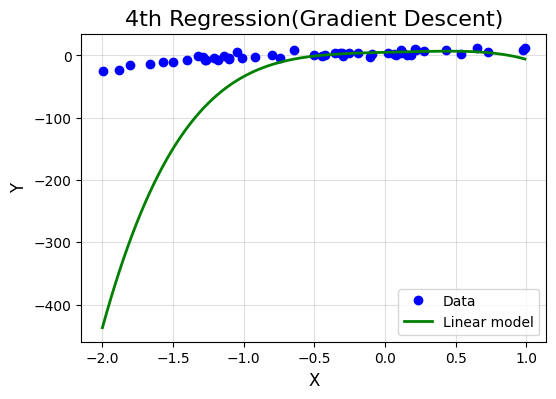

In [41]:
w3=0
w4=0
w=(A.T*A).I*A.T*y

lrate=0.01 #학습률
epochs=1000 #반복횟수(에폭)

#비선형 4차
for i in range(epochs):
  yp=w0+w1*x+w2*x**2
  dw0=(1/n)*np.sum(yp-y)
  dw1=(1/n)*np.sum((yp-y)*x)
  dw2=(1/n)*np.sum((yp-y)*x**2)
  dw3=(1/n)*np.sum((yp-y)*x**3)
  dw4=(1/n)*np.sum((yp-y)*x**4)
  w0=w0-lrate*dw0
  w1=w1-lrate*dw1
  w2=w2-lrate*dw2
  w3=w3-lrate*dw3
  w4=w4-lrate*dw4

w = [w0, w1, w2, w3, w4]
for i in range(5):
  print("parameter w"+str(i)+":",w[i]) #파라미터출력

xp=np.arange(-2.0,1.0,0.01).reshape(-1,1)
yp=w0 + w1*xp + w2*xp**2 + w3*xp**3 + w4*xp**4 #예측값

plt.figure(figsize=(6,4))
plt.title('4th Regression(Gradient Descent)',fontsize=16)
plt.xlabel('X',fontsize=12)
plt.ylabel('Y',fontsize=12)
plt.plot(x,y,'bo',label='Data')
plt.plot(xp[:,0],yp[:,0],'g',linewidth=2,label='Linear model')
plt.legend()
plt.axis('auto')
plt.grid(alpha=0.4)
plt.show()

3.
최소제곱법과 경사하강법 선형예측모델이었을 때는 w0(y절편)값과 w1(기울기)값이 똑같았지만 비선형 예측 모델에서 차이가 났다. 경사하강법의 w0값이 최소제곱법의 w0보다 작아졌고 경사하강법의 w1값이 최소제곱법보다 커졌다. w2의 값 또한 최소제곱법보다 커졌다. 그러나 값이 크게 다르지 않다는 것을 알 수 있었다.